<a href="https://colab.research.google.com/github/Consolucas/DesafiosAnaliseDados/blob/main/Desafio_ZoopPay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o notebook

Aproveite esse espaço para as atividades do curso de **IA aplicada a Data Science: utilizando IA na construção de visualização de dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Este notebook foi construído com espaços para adicionar o prompt que será utilizado para criar o código pelo ChatGPT e as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.


Logo abaixo, temos as url's onde estão localizadas as bases utilizadas no projeto juntamente com a url com dados que utilizaremos também no desafio

In [ ]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"
url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"
url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"

## Aula 01 - Conhecendo os dados

### Mão na Massa - Zoop Pay

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Vamos atuar como analista de dados de um e-commerce. Recebemos três bases de dados com os dados dos clientes e vendas em 2023 e quais clientes estão pré-cadastrados na Zoop Pay, respectivamente.

Vamos iniciar unindo as duas primeiras bases do nosso projeto ("vendas" e "clientes") em um DataFrame chamado "df" utilizando como chave a coluna "ID_compra". Além disso, vamos organizar as colunas na seguinte sequência:

["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

Construa um código para executar esta etapa usando o Python e a biblioteca Pandas.

In [ ]:
import pandas as pd

# Exemplo de como carregar os DataFrames, caso necessário:
vendas = pd.read_csv(url_vendas)
clientes = pd.read_csv(url_clientes)

# Unindo as bases "vendas" e "clientes" usando a coluna "ID_compra" como chave
df = pd.merge(vendas, clientes, on="ID_compra")

# Organizando as colunas na sequência especificada
colunas_ordenadas = ["ID_compra", "data", "horario", "categoria", "preco_unitario", "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade", "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra" ]

df = df[colunas_ordenadas]

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Agora, vamos unir o "df" com a base "zoop_pay", lida a partir da url "url_zoop_pay", gerando um novo "df". Para união das bases, utilizaremos a coluna "ID_cliente". Além disso, vamos ajustar a coluna "data" para o formato datetime, em que seu formato na base de dados está como "YYYY-MM-DD".

In [ ]:
# Substitua url_zoop_pay pela URL real fornecida para a base zoop_pay
zoop_pay = pd.read_csv(url_zoop_pay)

# Unindo o DataFrame df com a base zoop_pay utilizando a coluna "ID_cliente"
df = pd.merge(df, zoop_pay, on="ID_cliente")

# Ajustando a coluna "data" para o formato datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d')

# Exibindo as primeiras linhas do DataFrame resultante para verificação
df.head()

## Aula 02 - Visualizando os dados

### Mão na Massa - Gerando visuais em relação a localidade

#### Desafio 1:
Construa e execute um prompt no ChatGPT para gerar a partir de nossa base de dados um visual que apresente o faturamento das vendas por região. Lembre-se que aqui o faturamento é dado pelo produto do valor unitário pela quantidade comprada somado ao frete.

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

chat, agora precisamos criar um visual de faturamento por regiao. lembrando que o faturamento é dado pelo produto do valor unitário pela quantidade comprada somado ao frete.
gráfico de barras horizontais
minha base se chama df


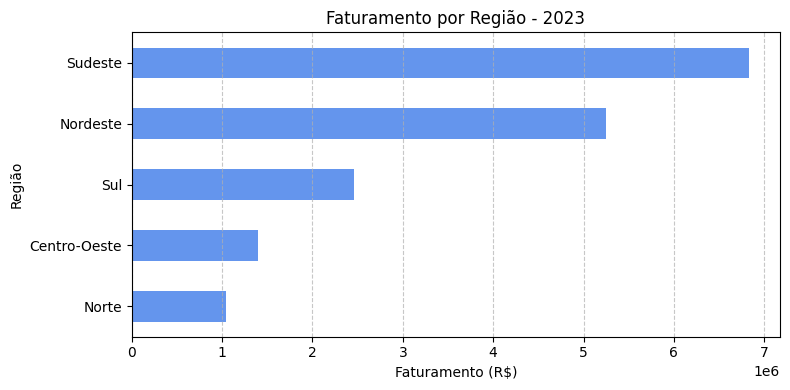

In [17]:
import matplotlib.pyplot as plt

# Criando a coluna de faturamento
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupando e somando por região
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().sort_values()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))
faturamento_por_regiao.plot(kind='barh', color='cornflowerblue')
plt.title('Faturamento por Região - 2023')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Região')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Desafio 2:
A Zoop quer realizar uma campanha nos estados de São Paulo e Rio de Janeiro, para isso, precisa saber o perfil de seu público de acordo com o sexo biológico. Construa e execute um prompt no ChatGPT para gerar a partir de nossa base de dados um visual que apresente a composição do público por sexo biológico nos estados de São Paulo e Rio de Janeiro. Lembre-se de pedir para agrupar ou empilhar os dados para apresentação.

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

agora precisamos de um visual identificando o público por sexo biológico no estado de são paulo e rio de janeiro.
crie um gráfico de barras empilhadas separado por sexo (coluna sexo_biologico) separando por estado Rio de Janeiro e São Paulo (coluna uf), contando por id (coluna ID_cliente)

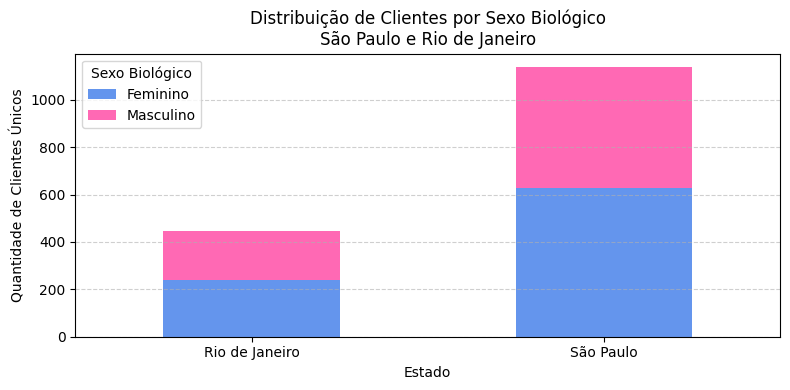

In [16]:
# Filtrando apenas os estados São Paulo e Rio de Janeiro
df_sp_rj = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contando clientes únicos por estado e sexo biológico
clientes_por_estado_sexo = df_sp_rj.groupby(['uf', 'sexo_biologico'])['ID_cliente'].nunique().unstack()

# Criando gráfico de barras empilhadas
clientes_por_estado_sexo.plot(kind='bar', stacked=True, figsize=(8, 4), color=['#6495ED', '#FF69B4'])

plt.title('Distribuição de Clientes por Sexo Biológico\nSão Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Clientes Únicos')
plt.legend(title='Sexo Biológico')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Aula 03 - Gerando mais visuais

### Mão na Massa - Perfil dos clientes

#### Desafio 1:
A Zoop está em processo de lançamento de sua carteira digital, que dará acesso a uma série de benefícios para sua clientela, e gostaria de saber qual a porcentagem de pessoas que já possuem pré-cadastro para este produto. O e-commerce busca compreender esse número para definir a necessidade de divulgação e esforço para chamar mais clientes para esta funcionalidade.

Construa e execute um prompt no ChatGPT para gerar a partir de nossa base de dados um visual que apresente a proporção de pessoas pré-cadastradas na Zoop Pay.

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

Mantendo minha base com no df, preciso que crie um visual representando as proporções dos clientes registrados no zoopPay (coluna zoop_pay)

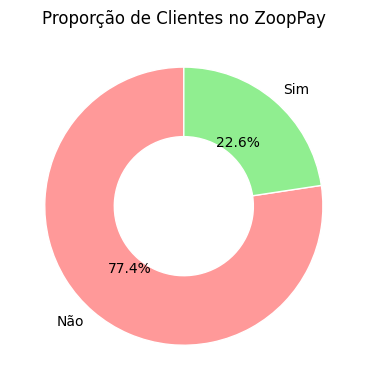

In [18]:
# Contagem dos clientes por status no ZoopPay
proporcao_zoop = df['zoop_pay'].value_counts()

# Cores personalizadas (ajuste conforme seu gosto)
cores = ['#FF9999', '#90EE90']  # Azul e laranja suave

# Criando o gráfico de rosca
plt.figure(figsize=(5, 4))
wedges, texts, autotexts = plt.pie(
    proporcao_zoop,
    labels=proporcao_zoop.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5, 'edgecolor': 'white'}  # width < 1 deixa em formato de rosca
)

plt.title('Proporção de Clientes no ZoopPay')
plt.tight_layout()
plt.show()

#### Desafio 2:

A Zoop quer analisar a distribuição das idades dos clientes por região a fim de traçar uma persona (perfil) de sua clientela em diferentes localidades do país e, para isso, requisitou um visual que distribuísse esses dados. Construa e execute um prompt no ChatGPT para gerar a partir de nossa base de dados um visual que apresente a distribuição das idades dos clientes por região.

Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='regiao', y='idade', palette='Set3')

plt.title('Distribuição da Idade dos Clientes por Região')
plt.xlabel('Região')
plt.ylabel('Idade')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Aula 04 - Técnicas de storytelling

### Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua própria.

In [ ]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

### Mão na Massa - Refinando os visuais escolhidos

#### Desafio 1:

Construa e execute um prompt no ChatGPT para refinar o visual que apresenta o faturamento das vendas por região. As instruções para refinamento são as seguintes:

Plano de fundo da figura e da área do plot na cor CINZA_1
Cor das colunas em AQUA_1 (caso queira destacar apenas uma, pode recorrer ao AQUA_3, por exemplo
Tamanho da figura de (10,6)
Altere o título da figura e seu tamanho para 18 e cor CINZA_5, ajuste os labels e rótulos do eixo x e y quando existirem para tamanho 12 e cor AZUL_1
Retire o máximo das bordas possível e ajuste os dados para serem apresentados nas barras na ordem de milhões na cor AZUL_1 e tamanho 12


Observação 1: Todas as variáveis que representam as cores nas instruções estão em uma célula na aba Paleta de Cores dentro do notebook Desafios na Aula 04.

Observação 2: É provável que ao rodar os prompts o ChatGPT sugira cores para as variáveis e alterações nos códigos que chamam o DataFrame desejado. Tenha bastante atenção para apagar a nova definição de cores e alterar o DataFrame de acordo com o que fez nas atividades anteriores.

##### Gráfico sem refinamento

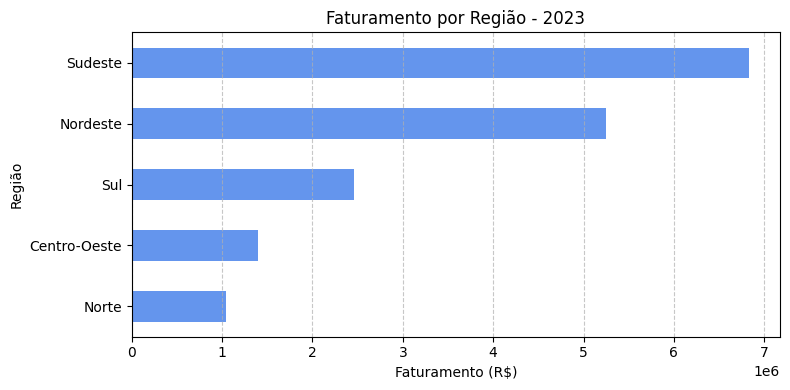

In [11]:
import matplotlib.pyplot as plt

# Criando a coluna de faturamento
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupando e somando por região
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().sort_values()

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))
faturamento_por_regiao.plot(kind='barh', color='cornflowerblue')
plt.title('Faturamento por Região - 2023')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Região')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Agora, vamos refinar o gráfico de rosca que produzimos para a proporção dos usuários que realizaram o pré-cadastro na Zoop Pay.

O nosso gráfico precisa seguir a identidade visual da Zoop, com o fundo da figura e do plot na cor CINZA_1, a cor da fatia de valor "Não" igual a CINZA_3, a cor da fatia de valor "Sim" igual a AZUL_3 e o tamanho da figura deve ser de (6, 6).

O título da figura é "Pré-cadastrado(a) na Zoop Pay?" com tamanho 18 e sua cor CINZA_5.

Os rótulos das fatias precisam ter a mesma cor das fatias e tamanho 12 e as porcentagens precisam estar na cor BRANCO, em negrito, e com tamanho 12.

A propriedade da largura da rosca (wedgeprops) precisa ser de 0.4, a posição das porcentagens dentro da fatia (pctdistance) precisa ser de 0.8, o ângulo de início de 180 (startangle) e sem explosão de fatias.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.



/tmp/ipython-input-30-3244177067.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(faturamento_por_regiao.index, fontsize=12, color=AZUL_1)


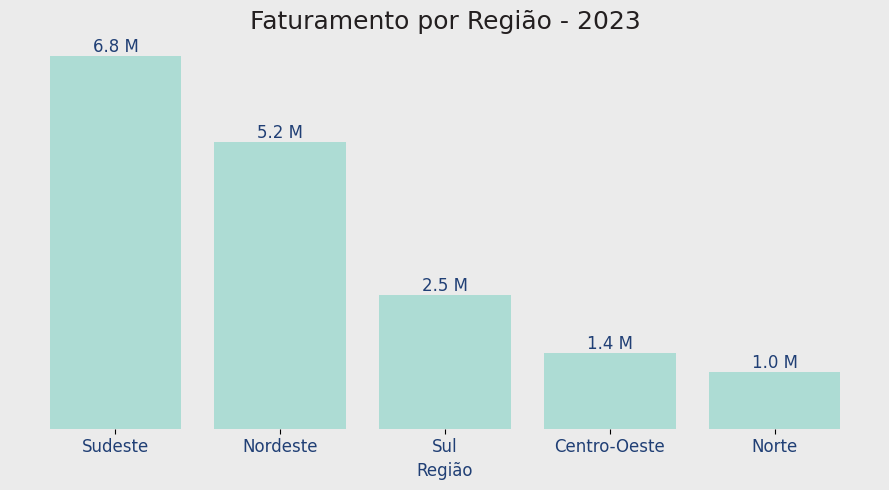

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Criando a coluna de faturamento
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupando e somando por região, do maior para o menor
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().sort_values(ascending=False)

# Criando o gráfico de barras verticais com formatação
fig, ax = plt.subplots(figsize=(9, 5), facecolor=CINZA_1)
ax.set_facecolor(CINZA_1)

# Barras em AQUA_1
barras = ax.bar(
    faturamento_por_regiao.index,
    faturamento_por_regiao.values,
    color=AQUA_1
)

# Título formatado
ax.set_title('Faturamento por Região - 2023', fontsize=18, color=CINZA_5)

# Eixo x formatado
ax.set_xlabel('Região', fontsize=12, color=AZUL_1)
ax.set_xticklabels(faturamento_por_regiao.index, fontsize=12, color=AZUL_1)

# Remover eixo y (ticks e label)
ax.set_yticks([])
ax.set_ylabel('')

# Remover as bordas
for spine in ax.spines.values():
    spine.set_visible(False)

# Adicionar os valores acima das barras
for bar in barras:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        altura,
        f'{altura/1e6:.1f} M',
        ha='center',
        va='bottom',
        fontsize=12,
        color=AZUL_1
    )

# Grid apenas no eixo y
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### Desafio 2:

Construa e execute um prompt no ChatGPT para refinar o visual que apresenta a proporção de pessoas pré-cadastradas na Zoop Pay. As instruções para refinamento são as seguintes:

* Plano de fundo da figura e da área do plot na cor CINZA_1
* Cor das fatias de AZUL_1 para “Sim” e CINZA_3 para “Não”
* Tamanho da figura de (6,6)
* Altere o título da figura e seu tamanho para 18 e cor CINZA_5
* Adicione os rótulos nas fatias com tamanho 12 e as porcentagem também em * tamanho 12 e em negrito. As porcentagens devem estar na cor BRANCO e os rótulos das fatias na mesma cor das fatias
* Ajuste a rosca para que sua largura seja de 0.4 e as porcentagens das fatias na posição 0.8 em relação ao centro
* Evite explosões de fatias e efeitos que dificultam a análise do gráfico


##### Gráfico sem refinamento

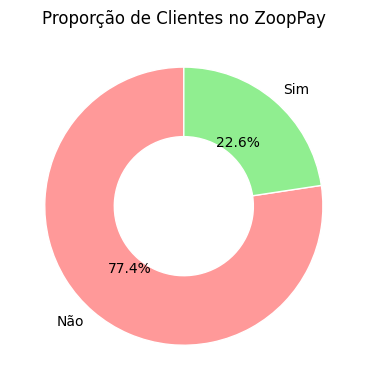

In [20]:
# Contagem dos clientes por status no ZoopPay
proporcao_zoop = df['zoop_pay'].value_counts()

# Cores personalizadas (ajuste conforme seu gosto)
cores = ['#FF9999', '#90EE90']  # Azul e laranja suave

# Criando o gráfico de rosca
plt.figure(figsize=(5, 4))
wedges, texts, autotexts = plt.pie(
    proporcao_zoop,
    labels=proporcao_zoop.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5, 'edgecolor': 'white'}  # width < 1 deixa em formato de rosca
)

plt.title('Proporção de Clientes no ZoopPay')
plt.tight_layout()
plt.show()

> #### <strong><font color="#203f75" size= 6>Prompt:</font></strong>

Escreva aqui o prompt que você utilizou para gerar o código do desafio!

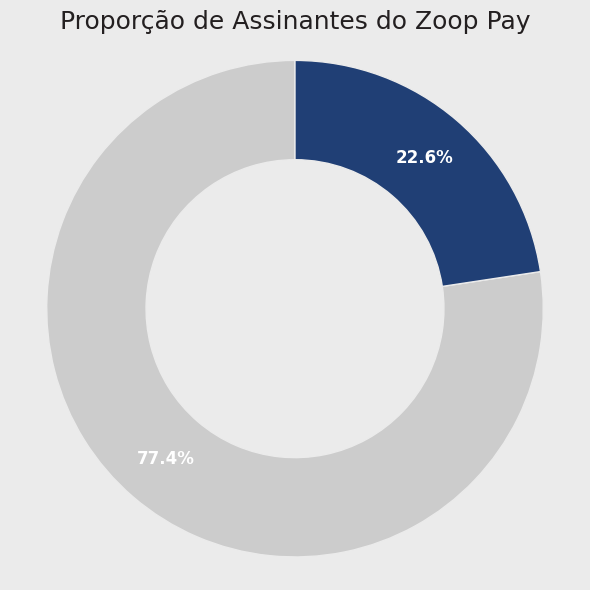

In [24]:
# Contagem dos dados
proporcao = df['zoop_pay'].value_counts()
labels = proporcao.index

# Cores: AZUL_1 para "Sim", CINZA_3 para "Não"
cores = [AZUL_1 if label == 'Sim' else CINZA_3 for label in labels]

# Criar figura com fundo e plot na cor CINZA_1
fig, ax = plt.subplots(figsize=(6, 6), facecolor=CINZA_1)
ax.set_facecolor(CINZA_1)

# Criar gráfico de rosca
wedges, texts, autotexts = ax.pie(
    proporcao,
    labels=labels,
    labeldistance=0.8,
    colors=cores,
    startangle=90,
    autopct='%1.1f%%',
    pctdistance=0.8,
    wedgeprops={'width': 0.4, 'edgecolor': CINZA_1}
)

# Estilizar rótulos das fatias
for text, color in zip(texts, cores):
    text.set_color(color)
    text.set_fontsize(12)

# Estilizar as porcentagens
for autotext in autotexts:
    autotext.set_color(BRANCO)
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Título com fonte 18 e cor CINZA_5
plt.title('Proporção de Assinantes do Zoop Pay', fontsize=18, color=CINZA_5)

# Centralizar corretamente
ax.axis('equal')
plt.tight_layout()
plt.show()
